In [78]:
import pandas as pd
from matplotlib import pyplot as plt 

Najprej vse naše podatke predstavimo v tabeli.

In [79]:
nepremicnine = pd.read_csv(r'..\projektna_naloga_nepremicnine\projektna_naloga_nepremicnine\oglasi.csv')

In [80]:
nepremicnine

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija
0,Castle,Vélines (24),1366200,390,6,1,ni podatka o agenciji
1,House with pool and terrace,Uzès (30),1025000,219,4,1,By Styles
2,Villa with pool,Uzès (30),448200,105,3,1,By Cigal&#39;immo
3,House with pool,Lourmarin (84),861900,120,4,coerce,By Michaël Zingraf Christie&#39;s Internationa...
4,House with pool and terrace,Nice (06),1074600,152,5,1,By Michaël Zingraf Real Estate Nice
...,...,...,...,...,...,...,...
1027,House with garden,Saintes (17),737100,375,6,coerce,By Mercure Forbes Global Properties Poitou-cha...
1028,House with pool,Saintes (17),646400,256,5,coerce,By Mercure Forbes Global Properties Poitou-cha...
1029,House,Celles-sur-Belle (79),737100,400,5,coerce,By Mercure Forbes Global Properties Poitou-cha...
1030,House with pool,Poitiers (86),795700,350,6,coerce,By Mercure Forbes Global Properties Poitou-cha...


Želimo dobiti boljši občutek o podatkih, zato bomo za vsak oglasi izračunali še ceno glede na površino hiše. Te podatke bomo dodali v tabelo v dodatni stolpec. Nato bomo podatke še sortirali naraščajoče glede na ceno na kvadrat.

In [81]:
nepremicnine['cena'] = pd.to_numeric(nepremicnine['cena'], errors='coerce')
nepremicnine['površina'] = pd.to_numeric(nepremicnine['površina'], errors='coerce')

In [82]:
nepremicnine['cena_glede_na_površino_hiše'] = round(nepremicnine.cena / nepremicnine.površina)

In [83]:
nepremicnine.sort_values('cena_glede_na_površino_hiše')

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija,cena_glede_na_površino_hiše
841,House,Tarascon (13),280800.0,358.0,7,coerce,By 36 Heures Immo,784.0
219,House,La Rochelle (17),673700.0,700.0,14,coerce,By Diva,962.0
1002,House,Vendome (41),317500.0,320.0,6,coerce,By Agence Mellinger Immobilier,992.0
917,House with pool,Saint-Mesmin (10),430900.0,414.0,5,1,By Yves Damonte Immobilier,1041.0
737,House with pool and garden,Aulnay (17),572400.0,532.0,12,1,By Rochella Immobilier,1076.0
...,...,...,...,...,...,...,...,...
32,Seaside contemporary house with pool and garden,Agde (34),NaN,121.0,3,1,By Maison Kamci,NaN
33,Villa with pool and terrace,Baden (56),NaN,186.0,4,1,By Immo-sea,NaN
368,House with pool,Fourneville (14),1077300.0,NaN,4,1,By Barnes Deauville,NaN
588,House,Sallenelles (14),907200.0,NaN,5,coerce,By Barnes Deauville,NaN


In [84]:
maximalna_povrsina = nepremicnine.površina.max()
minimalna_povrsina = nepremicnine.površina.min()
povprecna_povrsina = round(nepremicnine.površina.mean())

In [85]:
print(f'Površine obravnavanih nepremičnin zavzemajo vrednosti med {minimalna_povrsina} m² in {maximalna_povrsina} m², v povprečju pa hiša meri {povprecna_povrsina}m²')

Površine obravnavanih nepremičnin zavzemajo vrednosti med 60.0 m² in 710.0 m², v povprečju pa hiša meri 198m²


Iz vseh podatkov izračunamo še povprečno ceno na kvadratni meter hiše.

In [86]:
povprecje = nepremicnine.cena_glede_na_površino_hiše.mean()

In [87]:
round(povprecje)
print(f'Kvadratni meter hiše povprečno stane {round(povprecje)}€.')

Kvadratni meter hiše povprečno stane 4088€.


Radi bi še dobili občutek koliko posesti posameznega "tipa" nepremičnine imamo (npr. koliko hiš, hiš s teraso, vil..). To bomo za lažjo predstavo uprizorili s stolpičnim diagramom. Predstavili bomo samo tiste tipe posesti, ki se pojavijo več kot dvakrat.

In [88]:
nepremicnine.groupby('tip_hiše').size().sort_values()

tip_hiše
Castle                                               1
Farmhouse with outbuildings                          1
Farmhouse with pool                                  1
Seaside contemporary house with pool and garden      1
Seaside house with pool and terrace                  1
Seaside house with terrace                           1
Seaside house with garden and terrace                1
Seaside house with pool and garden                   1
Villa with garden and terrace                        1
Seaside villa with pool and garden                   1
Seaside house with garden                            2
Seaside house                                        2
Contemporary house with pool and garden              2
Longère                                              3
Bastide                                              4
Farmhouse                                            6
Villa with pool and garden                           9
Mas                                                 11
V

<Axes: xlabel='tip_hiše'>

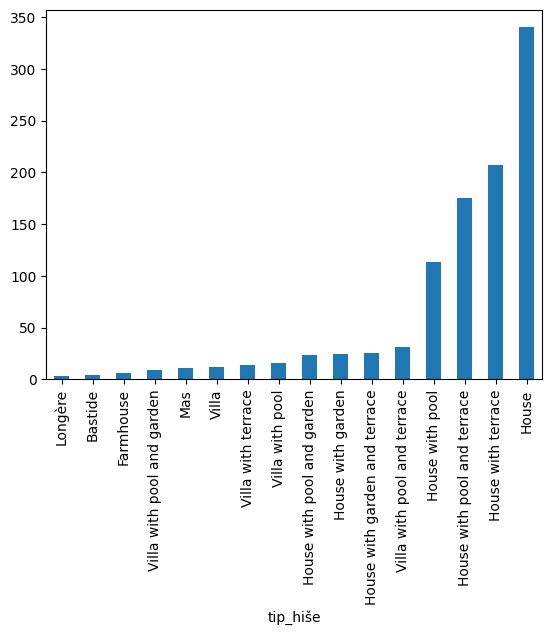

In [92]:
nepremicnine.groupby('tip_hiše').size().sort_values().tail(16).plot.bar()

Želimo izvedeti še, kakšna je okvirna povrprečna velikost posamezne sobe znotraj nepremičnine. Predpostavili bomo, da ima vsaka hiša poleg spalnic in kopalnic še tri sobe (hodnik, kuhinjo in dnevno sobo), če število kopalnic ni podano bomo privzeli, da ima hiša približno po eno kopalnico na dve spalnici. Število spalnic bomo torej delili z dva, zaokrožili navzdol in dobljenemu številu pripisali vrednost števila kopalnic.

In [90]:
nepremicnine

,tip_hiše,lokacija,cena,površina,število_spalnic,število_kopalnic,agencija,cena_glede_na_površino_hiše
0,Castle,Vélines (24),1366200.0,390.0,6,1,ni podatka o agenciji,3503.0
1,House with pool and terrace,Uzès (30),1025000.0,219.0,4,1,By Styles,4680.0
2,Villa with pool,Uzès (30),448200.0,105.0,3,1,By Cigal&#39;immo,4269.0
3,House with pool,Lourmarin (84),861900.0,120.0,4,coerce,By Michaël Zingraf Christie&#39;s Internationa...,7182.0
4,House with pool and terrace,Nice (06),1074600.0,152.0,5,1,By Michaël Zingraf Real Estate Nice,7070.0
...,...,...,...,...,...,...,...,...
1027,House with garden,Saintes (17),737100.0,375.0,6,coerce,By Mercure Forbes Global Properties Poitou-cha...,1966.0
1028,House with pool,Saintes (17),646400.0,256.0,5,coerce,By Mercure Forbes Global Properties Poitou-cha...,2525.0
1029,House,Celles-sur-Belle (79),737100.0,400.0,5,coerce,By Mercure Forbes Global Properties Poitou-cha...,1843.0
1030,House with pool,Poitiers (86),795700.0,350.0,6,coerce,By Mercure Forbes Global Properties Poitou-cha...,2273.0


In [91]:
nepremicnine.iloc[0].lokacija

'Vélines (24)'